# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ditto Ridhwan Wibowo]
- **Email:** [dittoridhwanw@gmail.com]
- **ID Dicoding:** [Ditto Ridhwan Wibowo]

## Menentukan Pertanyaan Bisnis

1. Apakah ada musim tertentu yang mempengaruhi tinggginya penyewaan sepeda?
2. Bagaimana grafik penyewaan sepeda per bulan baik untuk casual dan registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_hour = pd.read_csv('https://raw.githubusercontent.com/DittoRidhwanW/ProyekAnalisisData/refs/heads/main/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df_day = pd.read_csv('https://raw.githubusercontent.com/DittoRidhwanW/ProyekAnalisisData/refs/heads/main/day.csv', sep=";")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset **Hour** menjelaskan jumlah pengguna sepeda yang diagregasi per jam
- Dataset **Day** menjelaskan jumlah pengguna sepeda yang diagregasi per hari

### Assessing Data

####Hour

In [4]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
df_hour.duplicated().sum()

0

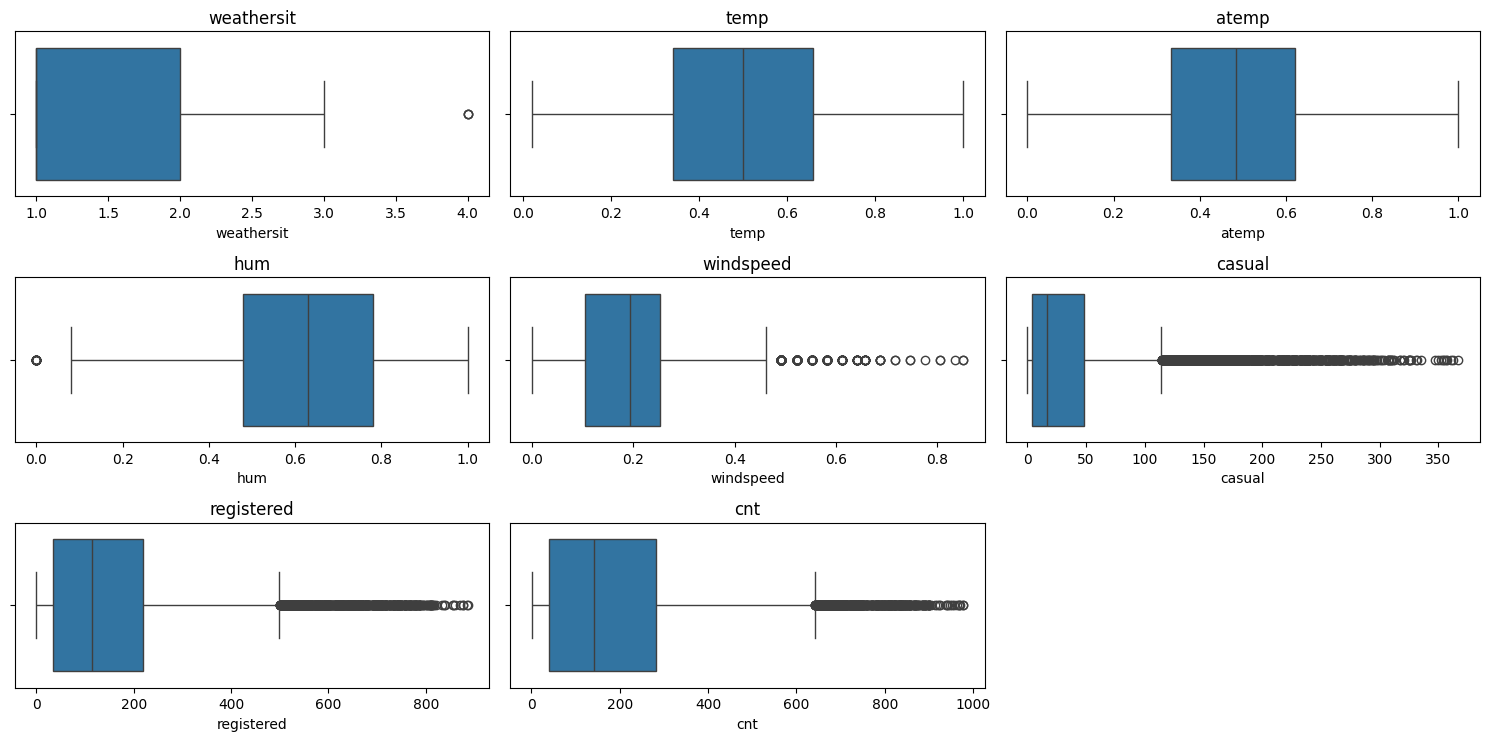

Outliers in 'weathersit': [4 4 4]
Outliers in 'temp': []
Outliers in 'atemp': []
Outliers in 'hum': [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Outliers in 'windspeed': [0.4925 0.5522 0.5224 0.5224 0.5821 0.5224 0.5821 0.5821 0.5224 0.5224
 0.5522 0.4925 0.5522 0.5224 0.4925 0.4925 0.5522 0.4925 0.5224 0.5821
 0.5224 0.4925 0.6567 0.6119 0.6119 0.4925 0.5224 0.6567 0.4925 0.7761
 0.6866 0.5224 0.5821 0.4925 0.4925 0.5224 0.5821 0.6567 0.5821 0.5821
 0.4925 0.6119 0.6567 0.7463 0.6418 0.6119 0.5224 0.5522 0.4925 0.5522
 0.5522 0.5522 0.6119 0.806  0.7463 0.4925 0.6119 0.4925 0.6119 0.6119
 0.4925 0.5224 0.5522 0.5224 0.4925 0.4925 0.6119 0.5821 0.5224 0.5821
 0.4925 0.4925 0.4925 0.6418 0.4925 0.4925 0.5522 0.5224 0.6119 0.4925
 0.5522 0.4925 0.5821 0.4925 0.4925 0.4925 0.5224 0.4925 0.5224 0.5224
 0.5224 0.5224 0.4925 0.5224 0.4925 0.5821 0.5224 0.5821 0.5821 0.5821
 0.5224 0.5522 0.5821 0.4925 0.4925 0.4925 0.6119 0.5224 0.5224 0.5821
 0.4925 0.5224 0.4925 0.49

In [8]:
# Create boxplots for each numerical feature to visualize outliers
numerical_features = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


plt.figure(figsize=(15, 12))  # Adjust figure size for better visualization

for i, col in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)  # Create subplots for each feature
    sns.boxplot(x=df_hour[col])
    plt.title(col)
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


# More robust outlier detection (using IQR) and handling
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


for col in numerical_features:
    outliers = detect_outliers_iqr(df_hour[col])
    print(f"Outliers in '{col}': {outliers.values}")


####Day

In [9]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
df_day.duplicated().sum()

0

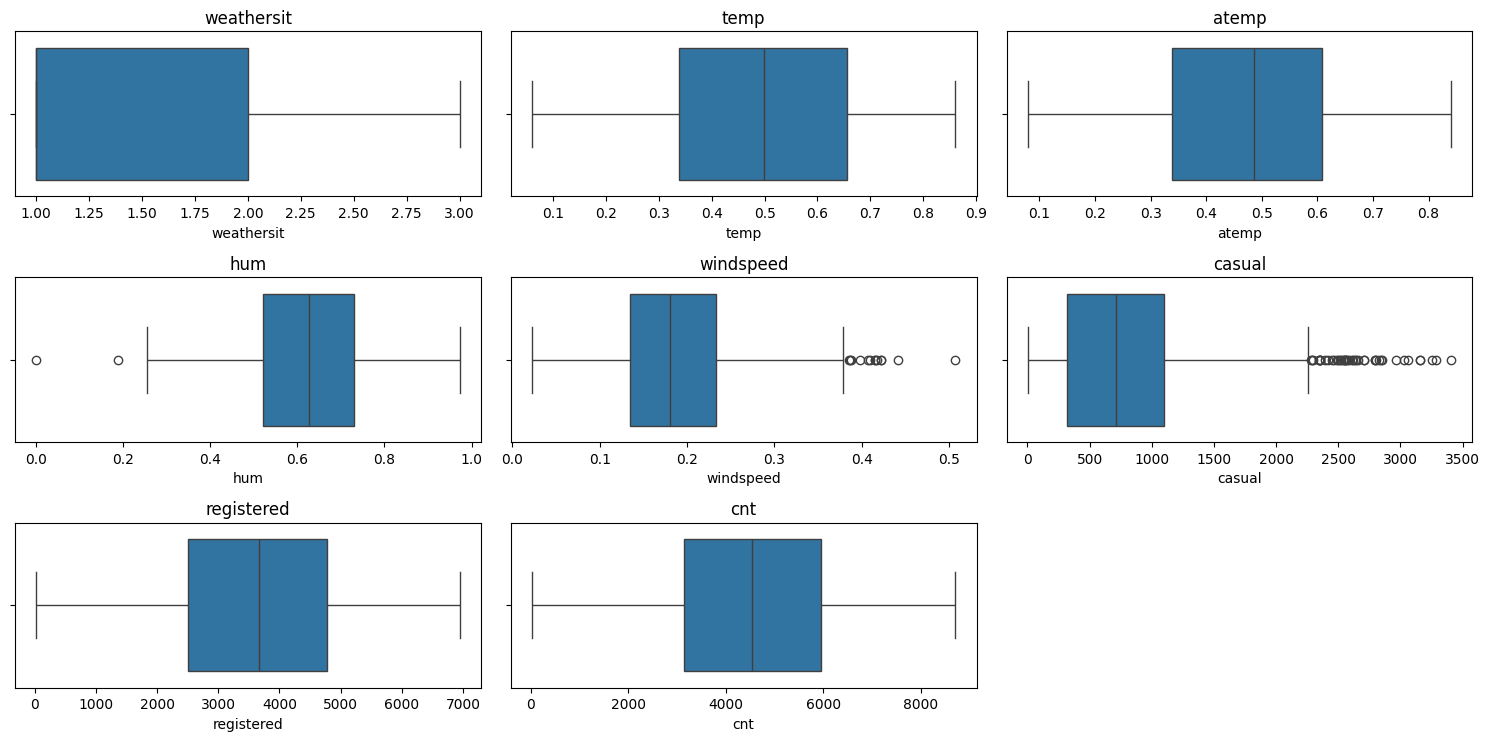

Outliers in 'weathersit': []
Outliers in 'temp': []
Outliers in 'atemp': []
Outliers in 'hum': [0.187917 0.      ]
Outliers in 'windspeed': [0.417908 0.507463 0.385571 0.388067 0.422275 0.415429 0.409212 0.421642
 0.441563 0.4148   0.386821 0.398008 0.407346]
Outliers in 'casual': [2355 2282 3065 2418 2521 2397 3155 2469 2301 2347 3252 2795 2846 2541
 2496 2622 3410 2704 2855 3283 2557 2795 2494 2708 2963 2634 2657 2551
 2562 2355 2544 2345 2827 2352 2613 2570 3160 2512 2454 2589 3031 2806
 2643 2290]
Outliers in 'registered': []
Outliers in 'cnt': []


In [13]:
# Create boxplots for each numerical feature to visualize outliers
numerical_features = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


plt.figure(figsize=(15, 12))  # Adjust figure size for better visualization

for i, col in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)  # Create subplots for each feature
    sns.boxplot(x=df_day[col])
    plt.title(col)
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


# More robust outlier detection (using IQR) and handling
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


for col in numerical_features:
    outliers = detect_outliers_iqr(df_day[col])
    print(f"Outliers in '{col}': {outliers.values}")


**Insight:**
-  Dataset Hour
  1. Jumlah datanya ada 17379
  2. Tidak ada data yang duplikat dan data yang missing value
  3. Terdapat data yang outlier seperti pada atribut **weathersit**, **hum**,  **windspeed**, **casual**, **registered**, dan **cnt** sehingga perlu di cleaning

- Dataset Day
  1. Jumlah datanya ada 731
  2. Tidak ada data yang duplikat dan data yang missing value
  3. Terdapat data yang outlier pada atribut **windspeed**, **hum** dan **casual** sehingga perlu di cleaning

### Cleaning Data

####df_hour

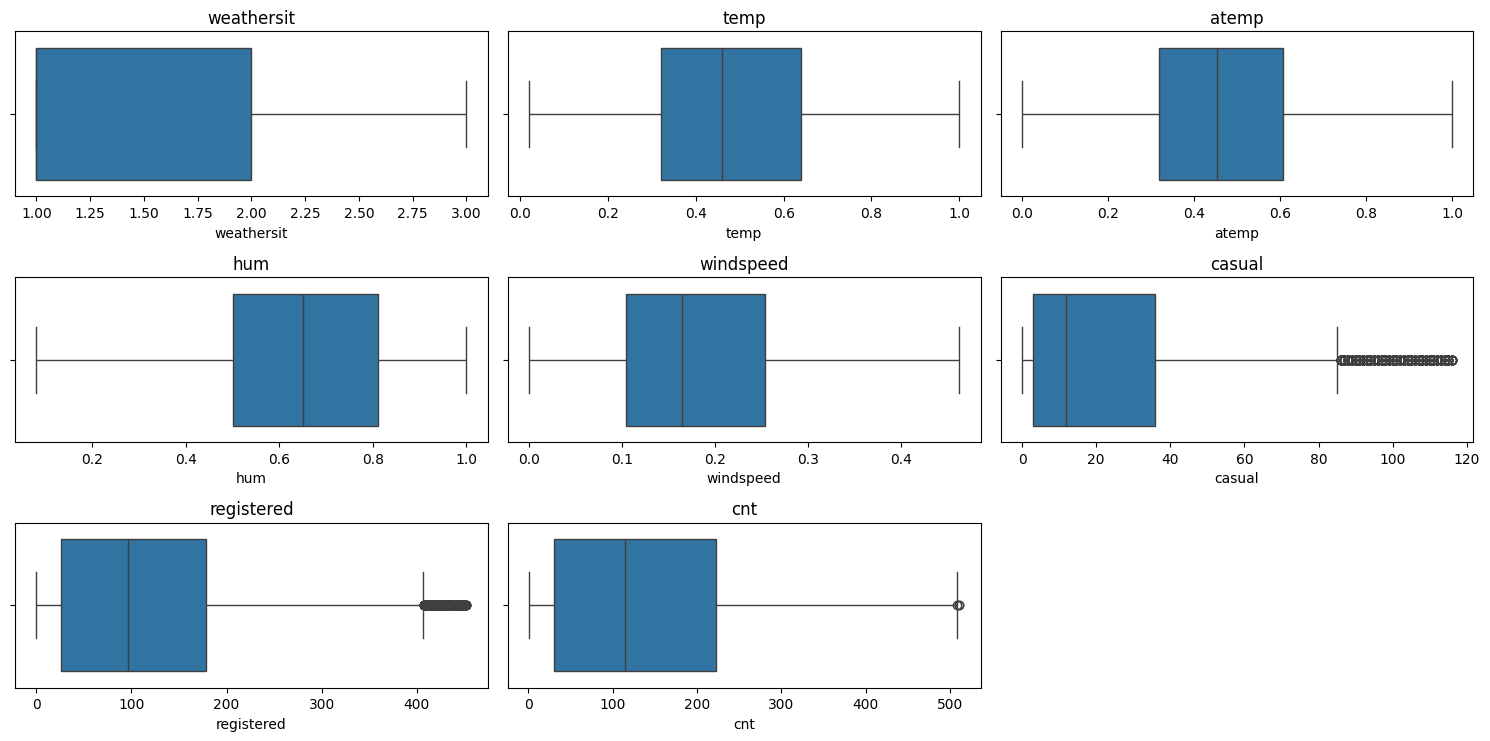

In [14]:
# Fungsi untuk mendeteksi dan menghapus outlier menggunakan IQR
def remove_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned

# Daftar kolom numerik untuk diproses
numerical_features = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Proses cleaning outlier untuk df_hour
for col in numerical_features:
    df_hour = remove_outliers_iqr(df_hour, col)

# Visualisasi data setelah outlier removal (df_hour)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=df_hour[col])
    plt.title(f'{col}')
    plt.tight_layout()
plt.show()



####df_day

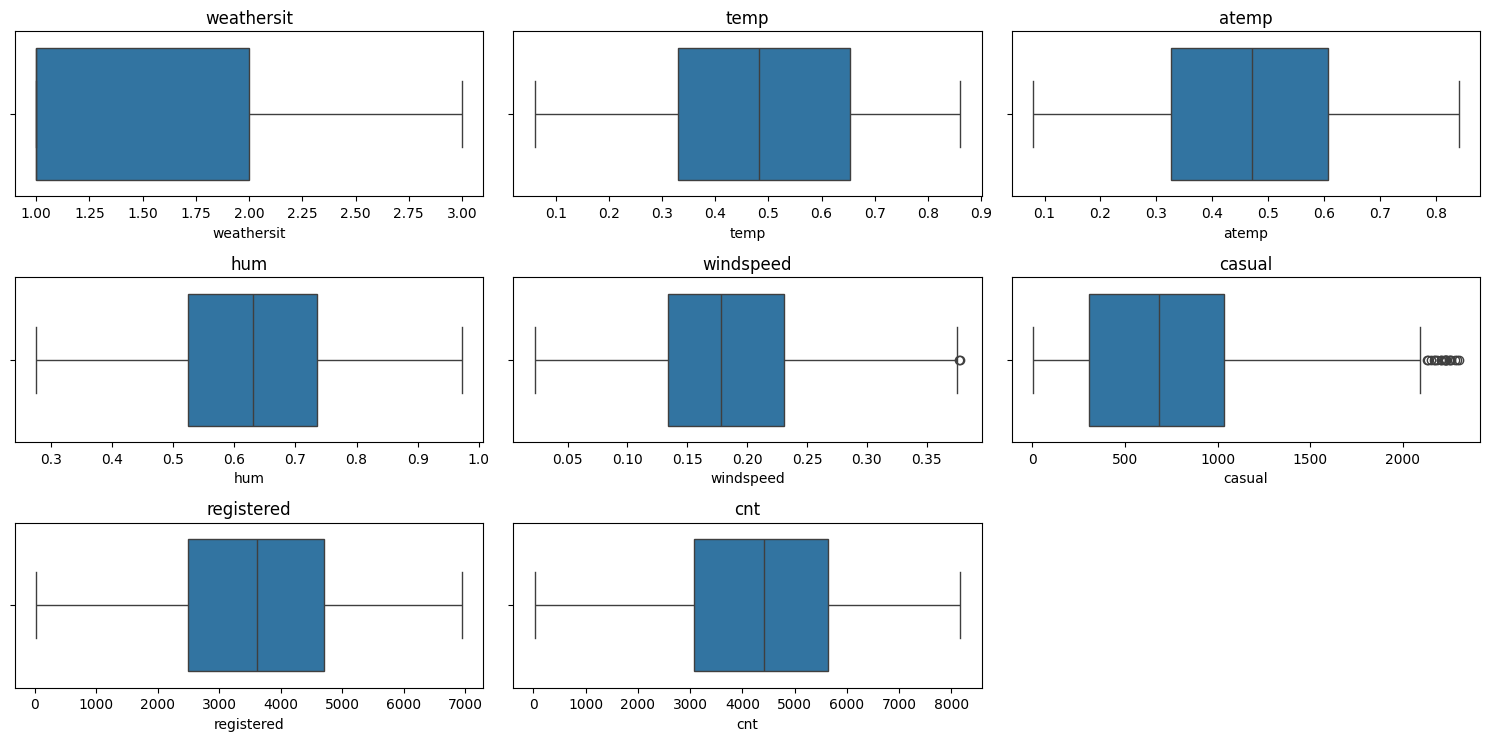

In [15]:
# Fungsi untuk mendeteksi dan menghapus outlier menggunakan IQR
def remove_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned

# Daftar kolom numerik untuk diproses
numerical_features = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Proses cleaning outlier untuk df_day
for col in numerical_features:
    df_day = remove_outliers_iqr(df_day, col)

# Visualisasi data setelah outlier removal (df_day)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=df_day[col])
    plt.title(f'{col}')
    plt.tight_layout()
plt.show()



**Insight:**
-  Dari analisis diatas dalam menangani otlier pada data day dan hour di cek menggunakan IQR, kemudian outlier tersebut dihapus.
-Berdasarkan visualisasi dari cleaning outlier tersebut hasilnya beberapa atribut outliernya sudah bersih tetapi ada juga yang outliernya menjadi berkurang

## Exploratory Data Analysis (EDA)

### Explore hour

In [16]:
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2697,2698,2011-04-27,2,0,4,7,0,3,1,2,0.58,0.5455,0.88,0.2836,17,229,246
7858,7859,2011-11-29,4,0,11,2,0,2,1,2,0.50,0.4848,0.88,0.0000,0,5,5
73,74,2011-01-04,1,0,1,5,0,2,1,1,0.12,0.1515,0.68,0.1045,0,4,4
98,99,2011-01-05,1,0,1,7,0,3,1,1,0.18,0.1818,0.43,0.1940,1,87,88
14156,14157,2012-08-18,3,1,8,1,0,6,0,3,0.62,0.5455,0.94,0.1642,14,78,92


In [17]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14964.000000,14964,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8426.645950,NaN,2.481422,0.474606,6.511093,11.097300,0.027934,2.993651,0.708768,1.445536,0.479332,0.460656,0.645874,0.180105,23.347835,117.737837,141.085672
std,5030.149618,NaN,1.126730,0.499371,3.526863,7.171896,0.164788,1.961509,0.454346,0.647979,0.190409,0.170295,0.188351,0.112192,26.413244,104.243228,121.801643
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4088.750000,NaN,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,26.000000,31.000000
50%,8258.500000,NaN,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.650000,0.164200,12.000000,96.000000,115.000000
75%,12722.750000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,36.000000,178.000000,222.000000


In [18]:
print(df_hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [19]:
print(df_hour.duplicated().sum())

0


In [20]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df_hour['season'] = df_hour['season'].map(season_mapping)

print(df_hour.tail())


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31  spring   1    12  19        0        1   
17375    17376  2012-12-31  spring   1    12  20        0        1   
17376    17377  2012-12-31  spring   1    12  21        0        1   
17377    17378  2012-12-31  spring   1    12  22        0        1   
17378    17379  2012-12-31  spring   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   4

In [21]:
year = {0: 2011, 1: 2012}
df_hour['yr'] = df_hour['yr'].map(year)

print(df_hour.tail())

       instant      dteday  season    yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31  spring  2012    12  19        0        1   
17375    17376  2012-12-31  spring  2012    12  20        0        1   
17376    17377  2012-12-31  spring  2012    12  21        0        1   
17377    17378  2012-12-31  spring  2012    12  22        0        1   
17378    17379  2012-12-31  spring  2012    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378    

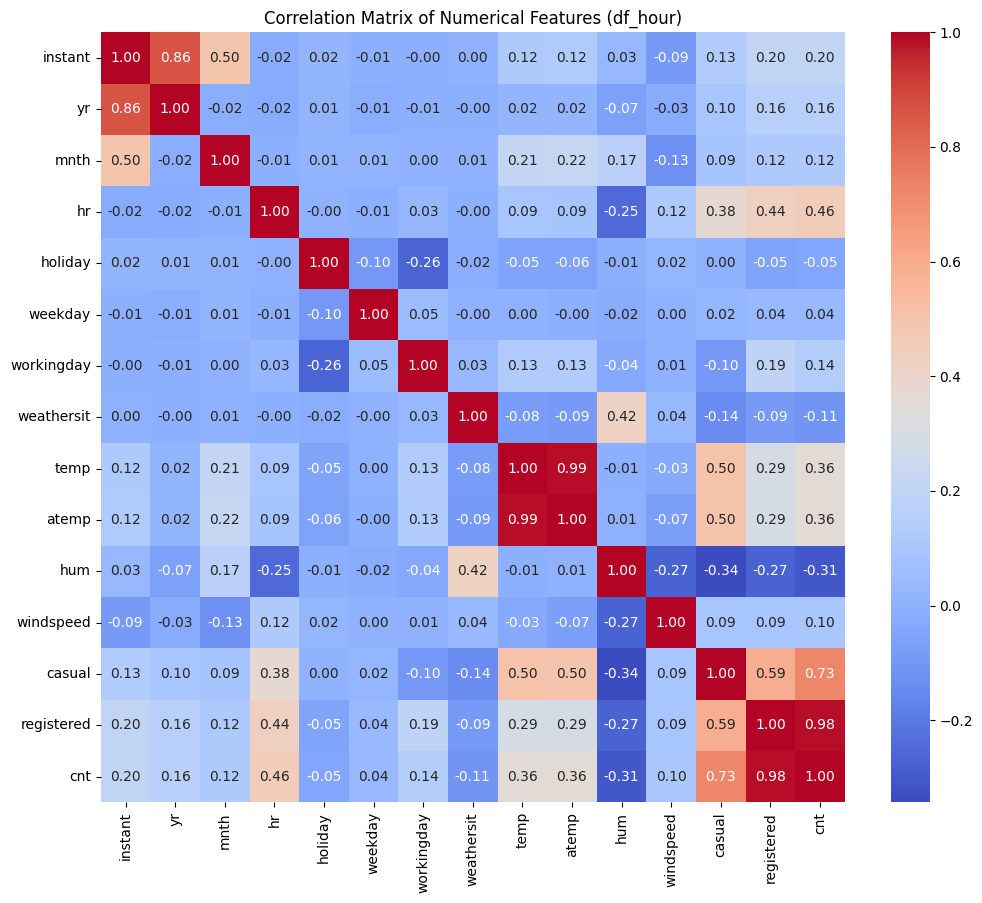

In [22]:
# prompt: buat untuk korelasi matrix

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df_hour.select_dtypes(include=['number']).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (df_hour)')
plt.show()


### Explore Day

In [23]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
110,111,21/04/2011,2,0,4,0,4,1,1,0.459167,0.453892,0.407083,0.325258,745,3444,4189
342,343,09/12/2011,4,0,12,0,5,1,1,0.290833,0.317542,0.695833,0.082717,261,3359,3620
46,47,16/02/2011,1,0,2,0,3,1,1,0.318261,0.316200,0.423478,0.251791,218,1897,2115
491,492,06/05/2012,2,1,5,0,0,0,2,0.562500,0.546737,0.740000,0.149879,2135,4224,6359


In [24]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,676.000000,676,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
unique,NaN,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,358.355030,NaN,2.505917,0.476331,6.559172,0.026627,2.958580,0.724852,1.405325,0.489558,0.469260,0.633115,0.186731,745.822485,3628.752959,4374.575444
std,212.140732,NaN,1.122812,0.499809,3.504206,0.161111,1.933272,0.446919,0.548318,0.184937,0.164443,0.140229,0.072371,531.970237,1576.370496,1862.966924
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.750000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.329167,0.326382,0.525059,0.134177,304.750000,2481.750000,3070.250000
50%,349.500000,NaN,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.481667,0.470633,0.631250,0.178481,685.000000,3615.500000,4417.000000
75%,545.250000,NaN,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.653541,0.607959,0.734583,0.230798,1033.750000,4696.250000,5642.500000


In [25]:
print(df_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [26]:
print(df_day.duplicated().sum())

0


In [27]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df_day['season'] = df_day['season'].map(season_mapping)

print(df_day.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01/01/2011  spring   0     1        0        6           0   
1        2  02/01/2011  spring   0     1        0        0           0   
2        3  03/01/2011  spring   0     1        0        1           1   
3        4  04/01/2011  spring   0     1        0        2           1   
4        5  05/01/2011  spring   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [28]:
year = {0: 2011, 1: 2012}
df_day['yr'] = df_day['yr'].map(year)

print(df_day.tail())

     instant      dteday  season    yr  mnth  holiday  weekday  workingday  \
726      727  27/12/2012  spring  2012    12        0        4           1   
727      728  28/12/2012  spring  2012    12        0        5           1   
728      729  29/12/2012  spring  2012    12        0        6           0   
729      730  30/12/2012  spring  2012    12        0        0           0   
730      731  31/12/2012  spring  2012    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
72

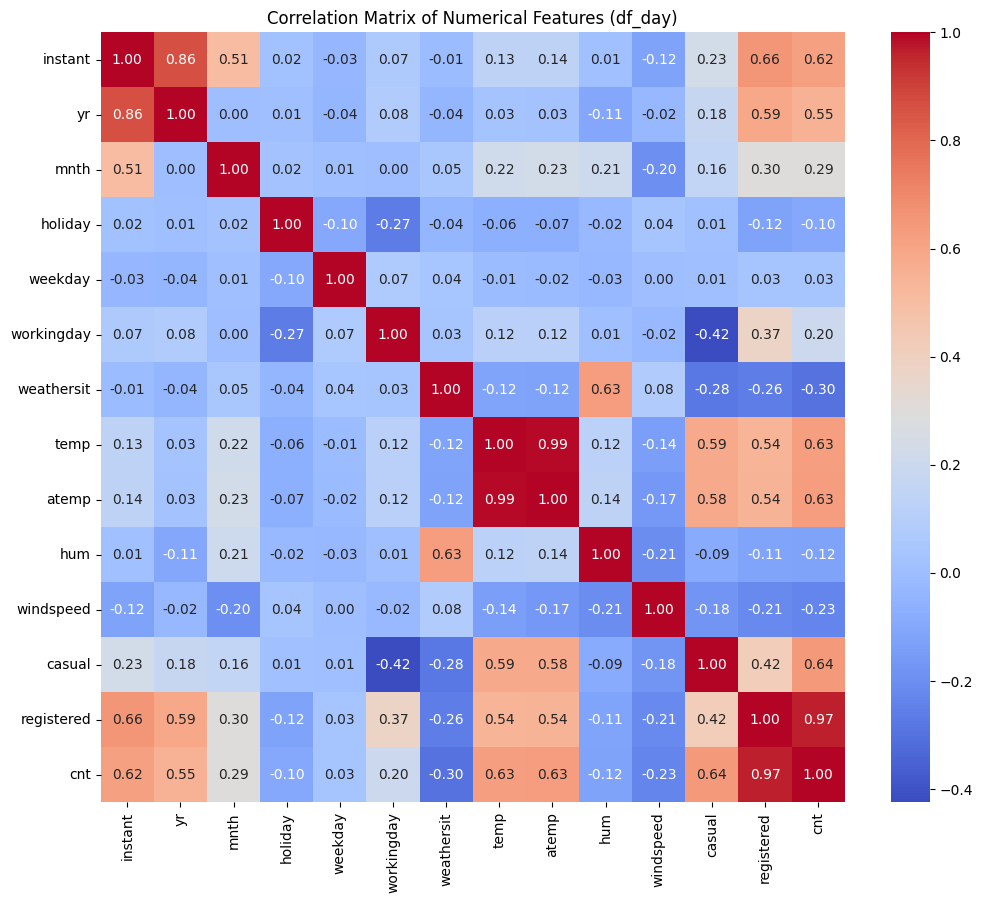

In [29]:
# prompt: buat untuk korelasi matrix

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df_day.select_dtypes(include=['number']).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (df_day)')
plt.show()


**Insight:**
- Dari proses EDA pada data hour bisa dilihat korelasi antar atribut seperti hubungan antara atribut **casual** dengan **temp** dan **atemp**.
- Selain itu pada data day terlihat pada atribut **hum** dan **weathersit** memiliki korelasi yang tinggi, dimana kondisi awan berpengaruh dari kelembapan udara
- Kemudian pada atribut **season** yang sebelumnya dikategorikan angka diubah ke dalam bentuk teks
- Atribut **yr** yang sebelumnya dikategorikan dengan nilai 0 dan 1 diubah menjadi 2011 untuk 0 dan 2012 untuk 1

## Visualization & Explanatory Analysis

### Pertanyaan 1:
#Apakah ada musim tertentu yang mempengaruhi tinggginya penyewaan sepeda?

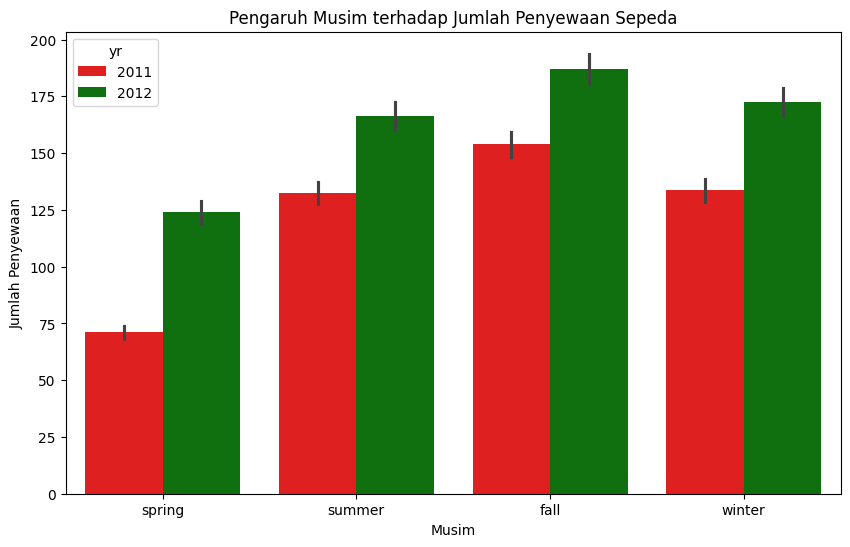

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='yr', data=df_hour, palette=['red', 'green'])
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

#Bagaimana grafik penyewaan sepeda per bulan baik untuk casual dan registered?

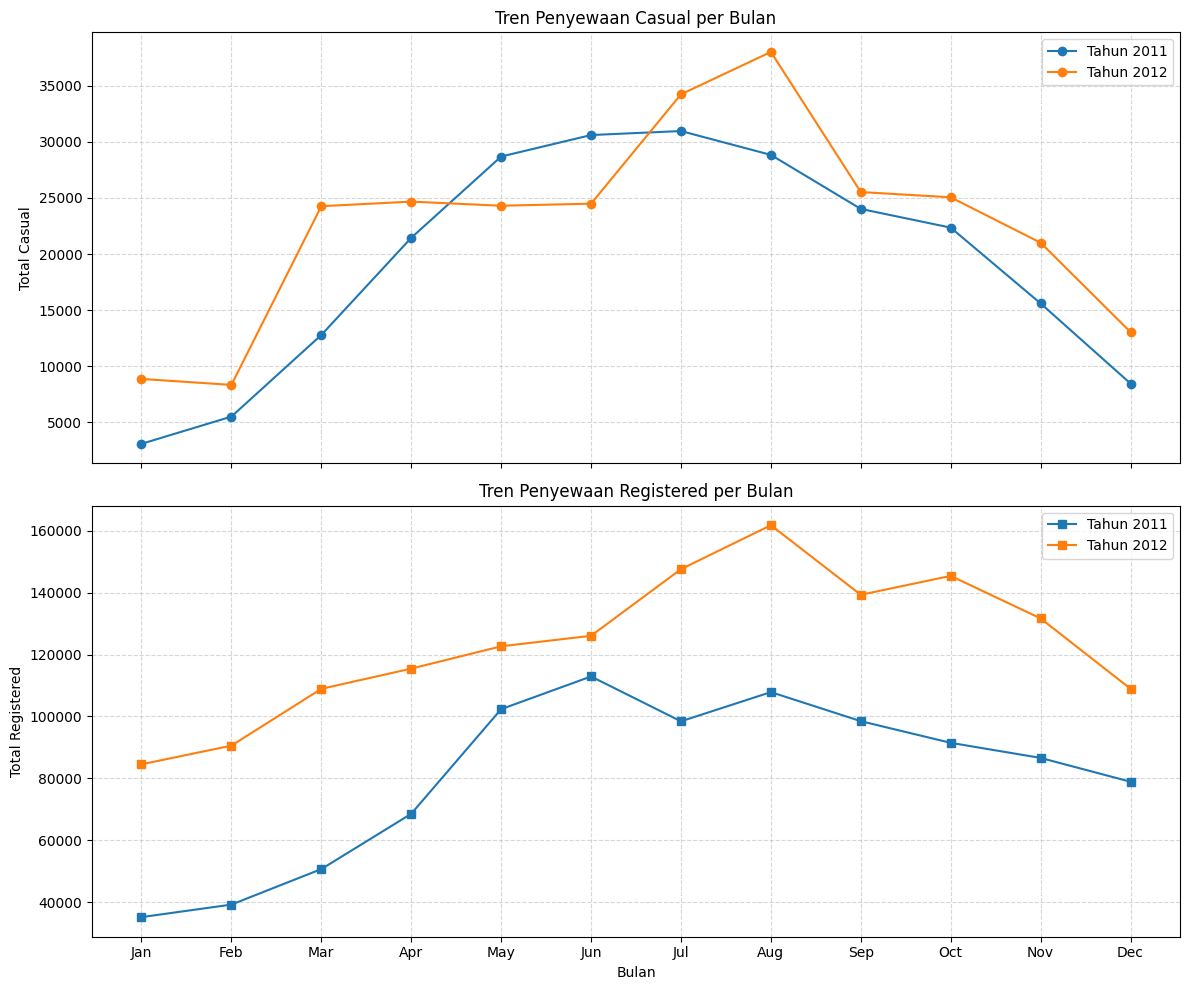

In [37]:
# Pastikan angka bulan dikonversi menjadi nama bulan lebih awal
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Mengelompokkan data berdasarkan tahun dan bulan, lalu menjumlahkan penyewaan
df_monthly = df_day.groupby(['yr', 'mnth'])[['casual', 'registered']].sum().reset_index()

# Mengonversi angka bulan menjadi nama bulan sebelum pivoting
df_monthly['mnth'] = df_monthly['mnth'].apply(lambda x: month_names[x-1])  # Konversi 1-12 ke nama bulan

# Buat pivot table agar tahun menjadi kolom, bulan menjadi index
df_pivot_casual = df_monthly.pivot_table(index='mnth', columns='yr', values='casual', aggfunc='sum')
df_pivot_registered = df_monthly.pivot_table(index='mnth', columns='yr', values='registered', aggfunc='sum')

# Pastikan index bulan berurutan dengan kategori
df_pivot_casual = df_pivot_casual.reindex(month_names)
df_pivot_registered = df_pivot_registered.reindex(month_names)

# Membuat figure dengan 2 subplots (casual & registered)
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Casual
for year in df_pivot_casual.columns:
    axes[0].plot(df_pivot_casual.index, df_pivot_casual[year], marker='o', linestyle='-', label=f'Tahun {year}')

axes[0].set_title('Tren Penyewaan Casual per Bulan')
axes[0].set_ylabel('Total Casual')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot Registered
for year in df_pivot_registered.columns:
    axes[1].plot(df_pivot_registered.index, df_pivot_registered[year], marker='s', linestyle='-', label=f'Tahun {year}')

axes[1].set_title('Tren Penyewaan Registered per Bulan')
axes[1].set_xlabel('Bulan')
axes[1].set_ylabel('Total Registered')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

# Sesuaikan layout agar tidak bertabrakan
plt.tight_layout()
plt.show()


**Insight:**


1.   Pertanyaan 1

*   Berdasarkan grafik, baik pada tahun 2011 dan 2012 musim yang paling berpengaruh pada tingginya penyewaan sepeda ada di musim fall (gugur) diikuti dengan musim spring (semi).
2.   Pertanyaan 2

*   Dari kedua grafik tersebut baik penyewaan secara casual ataupun registered di tahun 2011 memiliki kenaikan secara bertahap mulai dari bulan januari sampai bulan juni.Sedangkan di tahun 2012 mengalami kenaikan drastis mulai dari bulan juni sampai bulan agustus





## Conclusion


1.   Pertanyaan 1

*   Berdasarkan grafik, musim yang mempengaruhi penyewaan sepeda terbanyak ada di musim fall(musim gugur), ini dikarenakan pada musim gugur cuacanya lebih nyaman dan juga akses jalannya tidak licin dan aman.

2.   Pertanyaan 2

*   Dari kedua grafik tersebut baik penyewaan secara casual ataupun registered terjadi kenaikan drastis pada bulan agustus terjadi di tahun 2012. Beretepatan juga dengan adanya kompetisi bersepeda pada olimpiade 2012 di London, dimana hal itu menjadi salah satu penyebab banyaknya minat dalam bersepeda

In [36]:
# Save df_day to an Excel file
df_day.to_excel('bike_day.xlsx', index=False)

# Save df_hour to an Excel file
df_hour.to_excel('bike_hour.xlsx', index=False)

from google.colab import files
files.download('bike_day.xlsx')
files.download('bike_hour.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>